In [1]:
!rm -rf /content/sample_data
!pip install --upgrade --no-cache-dir gdown

#https://drive.google.com/file/d/1URAiuFIPv58x5ksGHCudyxfp0rN4lPsy/view?usp=sharing
!gdown https://drive.google.com/uc?id=1URAiuFIPv58x5ksGHCudyxfp0rN4lPsy

#https://drive.google.com/file/d/1v4VYTEbDQWj6aPbXUHzhBfUjktur3kLA/view?usp=sharing
!gdown https://drive.google.com/uc?id=1v4VYTEbDQWj6aPbXUHzhBfUjktur3kLA

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1URAiuFIPv58x5ksGHCudyxfp0rN4lPsy
To: /content/smmh.csv
100% 77.2k/77.2k [00:00<00:00, 3.46MB/s]
Downloading...
From: https://drive.google.com/uc?id=1v4VYTEbDQWj6aPbXUHzhBfUjktur3kLA
To: /content/Student Mental health.csv
100% 7.34k/7.34k [00:00<00:00, 41.0MB/s]


In [2]:
import pandas as pd
df = pd.read_csv('/content/Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
df.shape

(101, 11)

In [4]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [5]:
df.isna().mean() * 100

Timestamp                                       0.000000
Choose your gender                              0.000000
Age                                             0.990099
What is your course?                            0.000000
Your current year of Study                      0.000000
What is your CGPA?                              0.000000
Marital status                                  0.000000
Do you have Depression?                         0.000000
Do you have Anxiety?                            0.000000
Do you have Panic attack?                       0.000000
Did you seek any specialist for a treatment?    0.000000
dtype: float64

In [6]:
df = df.dropna()
df.shape

(100, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     100 non-null    object 
 1   Choose your gender                            100 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          100 non-null    object 
 4   Your current year of Study                    100 non-null    object 
 5   What is your CGPA?                            100 non-null    object 
 6   Marital status                                100 non-null    object 
 7   Do you have Depression?                       100 non-null    object 
 8   Do you have Anxiety?                          100 non-null    object 
 9   Do you have Panic attack?                     100 non-null    obj

In [8]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [9]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [10]:
df['Do you have Depression?'].value_counts()

No     65
Yes    35
Name: Do you have Depression?, dtype: int64

In [11]:
df = df.rename(columns={'Do you have Anxiety?':'Any history of Anxiety?',
                        'Do you have Panic attack?':'Any history of Panic attack?',
                        'Did you seek any specialist for a treatment?':'Any history of medical treatment?'})

In [12]:
df = df[(df['Age'] > 0) & (df['Age'] <= 100)]
df = df.drop(columns=['Timestamp'])
df.shape

(100, 10)

In [13]:
df.shape

(100, 10)

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
categorical_cols.remove('Do you have Depression?')

In [15]:
categorical_cols

['Choose your gender',
 'What is your course?',
 'Your current year of Study',
 'What is your CGPA?',
 'Marital status',
 'Any history of Anxiety?',
 'Any history of Panic attack?',
 'Any history of medical treatment?']

In [16]:
numerical_cols

['Age']

In [17]:
df.columns

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Any history of Anxiety?',
       'Any history of Panic attack?', 'Any history of medical treatment?'],
      dtype='object')

In [18]:
df['Do you have Depression?'].value_counts()

No     65
Yes    35
Name: Do you have Depression?, dtype: int64

In [19]:
d = dict()
for col in df.columns:
    d[col] = df[col].unique().tolist()
d

{'Choose your gender': ['Female', 'Male'],
 'Age': [18.0, 21.0, 19.0, 22.0, 23.0, 20.0, 24.0],
 'What is your course?': ['Engineering',
  'Islamic education',
  'BIT',
  'Laws',
  'Mathemathics',
  'Pendidikan islam',
  'BCS',
  'Human Resources',
  'Irkhs',
  'Psychology',
  'KENMS',
  'Accounting ',
  'ENM',
  'Marine science',
  'KOE',
  'Banking Studies',
  'Business Administration',
  'Law',
  'KIRKHS',
  'Usuluddin ',
  'TAASL',
  'Engine',
  'ALA',
  'Biomedical science',
  'koe',
  'Kirkhs',
  'BENL',
  'Benl',
  'IT',
  'CTS',
  'engin',
  'Econs',
  'MHSC',
  'Malcom',
  'Kop',
  'Human Sciences ',
  'Biotechnology',
  'Communication ',
  'Diploma Nursing',
  'Pendidikan Islam ',
  'Radiography',
  'psychology',
  'Fiqh fatwa ',
  'DIPLOMA TESL',
  'Koe',
  'Fiqh',
  'Islamic Education',
  'Nursing ',
  'Pendidikan Islam'],
 'Your current year of Study': ['year 1',
  'year 2',
  'Year 1',
  'year 3',
  'year 4',
  'Year 2',
  'Year 3'],
 'What is your CGPA?': ['3.00 - 3.49',


In [20]:
year_mapping = {
    'year 1': 1,
    'year 2': 2,
    'Year 1': 1,
    'year 3': 3,
    'year 4': 4,
    'Year 2': 2,
    'Year 3': 3
}

cgpa_mapping = {
    '3.00 - 3.49': 3.5,
    '3.50 - 4.00': 4,
    '3.50 - 4.00 ': 4,
    '2.50 - 2.99': 3,
    '2.00 - 2.49': 2.5,
    '0 - 1.99': 2
}

course_mapping = {
    'Engineering': 'Engineering',
    'Islamic education': 'Education',
    'BIT': 'IT',
    'Laws': 'Law',
    'Mathemathics': 'Mathematics',
    'Pendidikan islam': 'Education',
    'BCS': 'IT',
    'Human Resources': 'Human Resources',
    'Irkhs': 'Education',
    'Psychology': 'Psychology',
    'KENMS': 'Business',
    'Accounting ': 'Accounting',
    'ENM': 'Engineering',
    'Marine science': 'Science',
    'KOE': 'Education',
    'Banking Studies': 'Business',
    'Business Administration': 'Business',
    'KIRKHS': 'Education',
    'Usuluddin ': 'Education',
    'TAASL': 'Education',
    'Engine': 'Engineering',
    'ALA': 'Education',
    'Biomedical science': 'Science',
    'koe': 'Education',
    'Kirkhs': 'Education',
    'BENL': 'Education',
    'Benl': 'Education',
    'IT': 'IT',
    'CTS': 'IT',
    'engin': 'Engineering',
    'Econs': 'Economics',
    'MHSC': 'Science',
    'Malcom': 'Education',
    'Kop': 'Education',
    'Human Sciences ': 'Humanities',
    'Biotechnology': 'Science',
    'Communication ': 'Communication',
    'Diploma Nursing': 'Diploma',
    'Pendidikan Islam ': 'Education',
    'Radiography': 'Healthcare',
    'psychology': 'Psychology',
    'Fiqh fatwa ': 'Education',
    'DIPLOMA TESL': 'Diploma',
    'Koe': 'Education',
    'Fiqh': 'Education',
    'Islamic Education': 'Education',
    'Nursing ': 'Healthcare',
    'Pendidikan Islam': 'Education'
}


df['Your current year of Study'] = df['Your current year of Study'].map(year_mapping)

In [21]:
df.columns

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Any history of Anxiety?',
       'Any history of Panic attack?', 'Any history of medical treatment?'],
      dtype='object')

In [22]:
df['What is your course?'] = df['What is your course?'].map(course_mapping)
df['What is your CGPA?'] = df['What is your CGPA?'].map(cgpa_mapping)

In [23]:
d = dict()
for col in df.columns:
    d[col] = df[col].unique().tolist()
d

{'Choose your gender': ['Female', 'Male'],
 'Age': [18.0, 21.0, 19.0, 22.0, 23.0, 20.0, 24.0],
 'What is your course?': ['Engineering',
  'Education',
  'IT',
  'Law',
  'Mathematics',
  'Human Resources',
  'Psychology',
  'Business',
  'Accounting',
  'Science',
  nan,
  'Economics',
  'Humanities',
  'Communication',
  'Diploma',
  'Healthcare'],
 'Your current year of Study': [1, 2, 3, 4],
 'What is your CGPA?': [3.5, 4.0, 3.0, 2.5, 2.0],
 'Marital status': ['No', 'Yes'],
 'Do you have Depression?': ['Yes', 'No'],
 'Any history of Anxiety?': ['No', 'Yes'],
 'Any history of Panic attack?': ['Yes', 'No'],
 'Any history of medical treatment?': ['No', 'Yes']}

In [24]:
df = df.dropna()
df

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Any history of Anxiety?,Any history of Panic attack?,Any history of medical treatment?
0,Female,18.0,Engineering,1,3.5,No,Yes,No,Yes,No
1,Male,21.0,Education,2,3.5,No,No,Yes,No,No
2,Male,19.0,IT,1,3.5,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,3.5,Yes,Yes,No,No,No
4,Male,23.0,Mathematics,4,3.5,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,IT,1,4.0,No,No,Yes,No,No
97,Male,18.0,Engineering,2,3.5,No,Yes,Yes,No,No
98,Female,19.0,Healthcare,3,4.0,Yes,Yes,No,Yes,No
99,Female,23.0,Education,4,4.0,No,No,No,No,No


In [25]:
X = df.drop(columns=['Do you have Depression?'])
y = df[['Do you have Depression?']]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [27]:
X_train.shape,X_test.shape

((79, 9), (20, 9))

In [28]:
y_train.shape,y_test.shape

((79, 1), (20, 1))

In [29]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
categorical_cols.remove('Do you have Depression?')

In [30]:
numerical_cols

['Age', 'Your current year of Study', 'What is your CGPA?']

In [31]:
categorical_cols

['Choose your gender',
 'What is your course?',
 'Marital status',
 'Any history of Anxiety?',
 'Any history of Panic attack?',
 'Any history of medical treatment?']

In [34]:
d = dict()
for col in categorical_cols:
    d[col] = df[col].unique().tolist()
d

{'Choose your gender': ['Female', 'Male'],
 'What is your course?': ['Engineering',
  'Education',
  'IT',
  'Law',
  'Mathematics',
  'Human Resources',
  'Psychology',
  'Business',
  'Accounting',
  'Science',
  'Economics',
  'Humanities',
  'Communication',
  'Diploma',
  'Healthcare'],
 'Marital status': ['No', 'Yes'],
 'Any history of Anxiety?': ['No', 'Yes'],
 'Any history of Panic attack?': ['Yes', 'No'],
 'Any history of medical treatment?': ['No', 'Yes']}

In [36]:
X_train.to_dict(orient='index')[0]

{'Choose your gender': 'Female',
 'Age': 18.0,
 'What is your course?': 'Engineering',
 'Your current year of Study': 1,
 'What is your CGPA?': 3.5,
 'Marital status': 'No',
 'Any history of Anxiety?': 'No',
 'Any history of Panic attack?': 'Yes',
 'Any history of medical treatment?': 'No'}

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

column_transformer = make_column_transformer(
    (StandardScaler(), numerical_cols),
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
)

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [38]:
X_train.shape,X_test.shape

((79, 26), (20, 26))

In [39]:
!pip install scikit-plot

In [40]:
label = y_test['Do you have Depression?'].unique().tolist()

In [41]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 0.6323728561401367
Prediction time (sec) = 0.0001671314239501953

Training score = 0.8126780626780626
Testing score = 0.7747252747252746

No of misclassified for class No (test data) = 4
No of misclassified for class Yes (test data) = 1
Total no of misclassified points (test data) = 5
Total % of misclassified points (test data) = 0.25

Training log_loss = 0.3785581910113515
Testing log_loss = 0.5937171407563795

Confusion matrix:


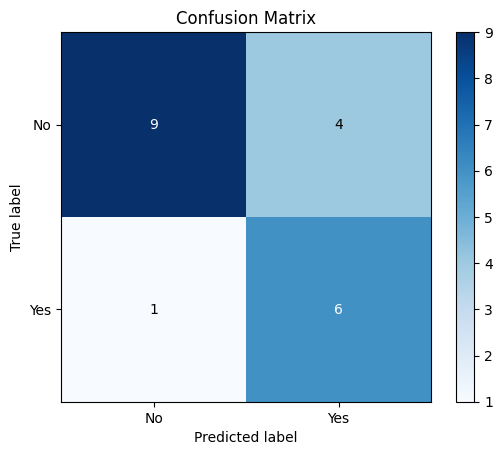

Classification report:

              precision    recall  f1-score   support

          No       0.90      0.69      0.78        13
         Yes       0.60      0.86      0.71         7

    accuracy                           0.75        20
   macro avg       0.75      0.77      0.74        20
weighted avg       0.80      0.75      0.76        20

**************************************************************************


In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.0032553672790527344
Prediction time (sec) = 8.58306884765625e-05

Training score = 0.8215811965811965
Testing score = 0.6263736263736264

No of misclassified for class No (test data) = 6
No of misclassified for class Yes (test data) = 2
Total no of misclassified points (test data) = 8
Total % of misclassified points (test data) = 0.4

Confusion matrix:


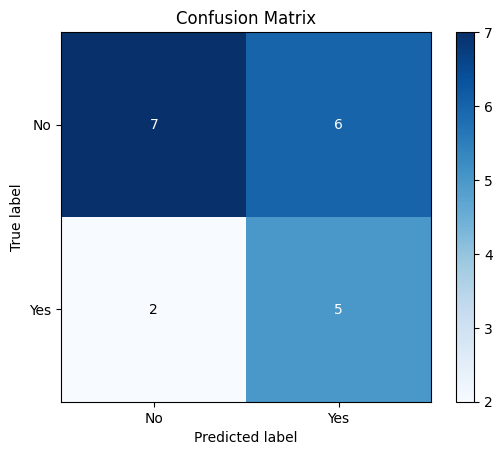

Classification report:

              precision    recall  f1-score   support

          No       0.78      0.54      0.64        13
         Yes       0.45      0.71      0.56         7

    accuracy                           0.60        20
   macro avg       0.62      0.63      0.60        20
weighted avg       0.66      0.60      0.61        20

**************************************************************************


In [43]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.0028727054595947266
Prediction time (sec) = 0.00012922286987304688

Training score = 0.9814814814814814
Testing score = 0.7087912087912087

No of misclassified for class No (test data) = 2
No of misclassified for class Yes (test data) = 3
Total no of misclassified points (test data) = 5
Total % of misclassified points (test data) = 0.25

Training log_loss = 0.026089942666154983
Testing log_loss = 9.112081604411458

Confusion matrix:


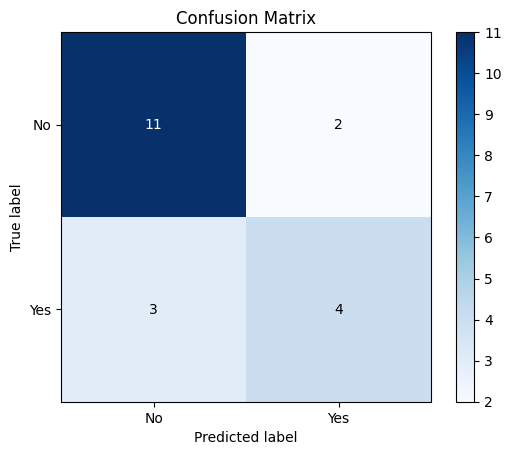

Classification report:

              precision    recall  f1-score   support

          No       0.79      0.85      0.81        13
         Yes       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20

**************************************************************************


In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.07868361473083496
Prediction time (sec) = 0.003539562225341797

Training score = 0.9814814814814814
Testing score = 0.6373626373626373

No of misclassified for class No (test data) = 2
No of misclassified for class Yes (test data) = 4
Total no of misclassified points (test data) = 6
Total % of misclassified points (test data) = 0.3

Training log_loss = 0.026089942666154962
Testing log_loss = 0.5327548804119371

Confusion matrix:


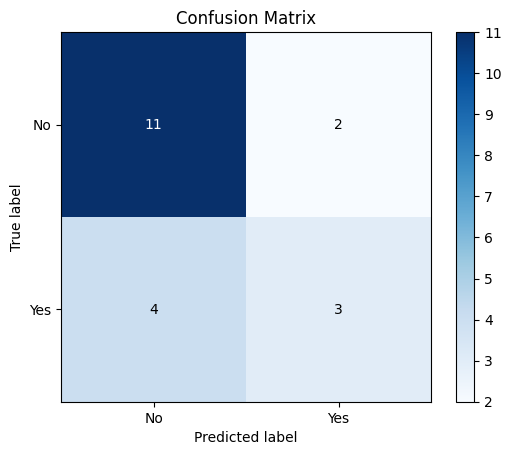

Classification report:

              precision    recall  f1-score   support

          No       0.73      0.85      0.79        13
         Yes       0.60      0.43      0.50         7

    accuracy                           0.70        20
   macro avg       0.67      0.64      0.64        20
weighted avg       0.69      0.70      0.69        20

**************************************************************************


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.17090654373168945
Prediction time (sec) = 0.0066318511962890625

Training score = 0.9814814814814814
Testing score = 0.7142857142857143

No of misclassified for class No (test data) = 0
No of misclassified for class Yes (test data) = 4
Total no of misclassified points (test data) = 4
Total % of misclassified points (test data) = 0.2

Training log_loss = 0.1368409686504583
Testing log_loss = 0.505682344843802

Confusion matrix:


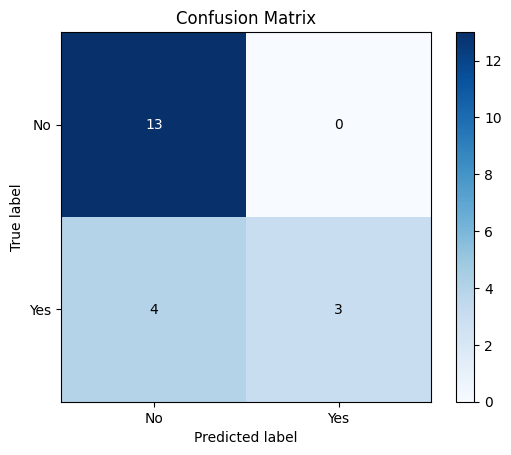

Classification report:

              precision    recall  f1-score   support

          No       0.76      1.00      0.87        13
         Yes       1.00      0.43      0.60         7

    accuracy                           0.80        20
   macro avg       0.88      0.71      0.73        20
weighted avg       0.85      0.80      0.77        20

**************************************************************************


In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [47]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results]
s2=['LR','LSVC','DTC','ETC','RFC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.812678,0.774725,5,0.25,0.378558,0.593717,0.632373,0.000167
1,LSVC,0.821581,0.626374,8,0.40,NaN,NaN,0.003255,0.000086
2,DTC,0.981481,0.708791,5,0.25,0.026090,9.112082,0.002873,0.000129
3,ETC,0.981481,0.637363,6,0.30,0.026090,0.532755,0.078684,0.003540
4,RFC,0.981481,0.714286,4,0.20,0.136841,0.505682,0.170907,0.006632


In [48]:
column_transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Your current year of Study',
                                  'What is your CGPA?']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Choose your gender', 'What is your course?',
                                  'Marital status', 'Any history of Anxiety?',
                                  'Any history of Panic attack?',
                                  'Any history of medical treatment?'])])

In [49]:
lr

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [50]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(column_transformer, lr)
joblib.dump(pipeline, 'lr_pipeline.joblib')

['lr_pipeline.joblib']

In [53]:
import pandas as pd
import numpy as np

def predict_social_media_impact(params_dict, model_pipeline):
    data = pd.DataFrame(params_dict, index=[0])
    predictions = pipeline.predict(data)
    prob = pipeline.predict_proba(data)
    return predictions[0],np.max(prob)

In [54]:
params_dict = {'Choose your gender': 'Female',
 'Age': 18.0,
 'What is your course?': 'Engineering',
 'Your current year of Study': 1,
 'What is your CGPA?': 3.5,
 'Marital status': 'No',
 'Any history of Anxiety?': 'No',
 'Any history of Panic attack?': 'Yes',
 'Any history of medical treatment?': 'No'}


In [55]:
predictions = predict_social_media_impact(params_dict=params_dict, model_pipeline=pipeline)
print(predictions)

('Yes', 0.5578527068299475)


In [56]:
!pip list | grep scikit-learn

scikit-learn                     1.2.2
